In [101]:
# Import necessary packages
import pandas as pd
import seaborn as sns
%pylab inline
from matplotlib import pyplot as plt
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [100]:
# Read the CSV ( I am looking at weekly market prices of fruits and vegetables in Canada)
df1 = pd.read_csv('WeeklyWholesaleMarketPrices_PrixHebdomadaireMarcheGros (1).csv')
df1.head(10)


,Date,CentreEn_CentreAn,CentreFr_CentreFr,CmdtyEn_PrdtAn,CmdtyEn_PrdtFr,VrtyEn_VrteAn,VrtyFr_VrteFr,GradeEn_CtgryAn,GradeFr_CtgryFr,Cntry_Pays,...,PkgTypeEn_EmpqtgAn,PkgTypeFr_EmpqtgFr,CntrTypeEn_TypeCntrAn,CntrTypeFr_TypeCntrFr,PkgQty_QtePqt,PkgWt_PdsPqt,UnitMsrEn_QteUnitAn,UnitMsrFr_QteUnitFr,PkgSizeEn_TaillePqtAn,PkgSizeFr_TaillePqtFr
0,2015-09-04,Wholesale-Calgary,Prix de gros-Calgary,ALFALFA SPROUTS,GERMES DE LUZERNE,UNSPECIFIED,INCONNUE,NaN,NaN,CA,...,Ctn 12X130 Gr,Ctn 12X130 Gr,Ctn,Ctn,12.0,130.0,Gr,Gr,NaN,NaN
1,2015-09-04,Wholesale-Edmonton,Prix de gros-Edmonton,ALFALFA SPROUTS,GERMES DE LUZERNE,UNSPECIFIED,INCONNUE,NaN,NaN,CA,...,Ctn 12X130 Gr,Ctn 12X130 Gr,Ctn,Ctn,12.0,130.0,Gr,Gr,NaN,NaN
2,2015-09-04,Wholesale-Vancouver,Prix de gros-Vancouver,ALFALFA SPROUTS,GERMES DE LUZERNE,UNSPECIFIED,INCONNUE,NaN,NaN,CA,...,Ctn 12X4 Oz,Ctn 12X4 Oz,Ctn,Ctn,12.0,4.0,Oz,Oz,NaN,NaN
3,2015-09-04,Wholesale-Winnipeg,Prix de gros-Winnipeg,ALFALFA SPROUTS,GERMES DE LUZERNE,UNSPECIFIED,INCONNUE,NaN,NaN,CA,...,Ctn 12X130 Gr,Ctn 12X130 Gr,Ctn,Ctn,12.0,130.0,Gr,Gr,NaN,NaN
4,2015-09-04,Wholesale-Edmonton,Prix de gros-Edmonton,APPLES,POMMES,AMBROSIA,AMBROSIE,Extra Fancy,Très Chic,CA,...,Ctn 40 lbs 56,Ctn 40 lbs 56,Ctn,Ctn,NaN,40.0,lbs,lbs,56,56
5,2015-09-04,Wholesale-Vancouver,Prix de gros-Vancouver,APPLES,POMMES,BRAEBURN,BRAEBURN,Extra Fancy,Très Chic,NZ,...,T/P 90,T/P 90,T/P,T/P,NaN,NaN,NaN,NaN,90,90
6,2015-09-04,Wholesale-Winnipeg,Prix de gros-Winnipeg,APPLES,POMMES,BRAEBURN,BRAEBURN,Extra Fancy,Très Chic,US,...,Ctn 40 lbs 100-110,Ctn 40 lbs 100-110,Ctn,Ctn,NaN,40.0,lbs,lbs,100-110,100-110
7,2015-09-04,Wholesale-Calgary,Prix de gros-Calgary,APPLES,POMMES,BRAEBURN,BRAEBURN,NaN,NaN,NZ,...,T/P 90,T/P 90,T/P,T/P,NaN,NaN,NaN,NaN,90,90
8,2015-09-04,Wholesale-Edmonton,Prix de gros-Edmonton,APPLES,POMMES,BRAEBURN,BRAEBURN,NaN,NaN,NZ,...,Ctn 40 lbs 90,Ctn 40 lbs 90,Ctn,Ctn,NaN,40.0,lbs,lbs,90,90
9,2015-09-04,Wholesale-Calgary,Prix de gros-Calgary,APPLES,POMMES,FUJI,FUJI,Extra Fancy,Très Chic,US,...,T/P 56,T/P 56,T/P,T/P,NaN,NaN,NaN,NaN,56,56


In [104]:
#Log transform data 
df1['log_max'] = np.log(df1['HighPrice_PrixMax'])
df1['log_min'] = np.log(df1['LowPrice_PrixMin'])

/Users/nadimyounes/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


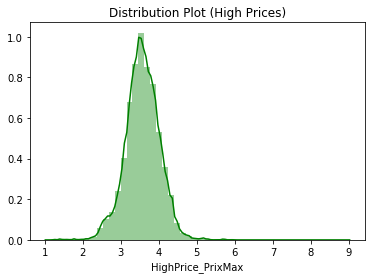

In [102]:
# Are the weekly Max/Min price  normally distributed ?
plt.figure()
sns.distplot(log_max,color='green') 
plt.title('Distribution Plot (High Prices)')

/Users/nadimyounes/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution Plot (Low Prices)')

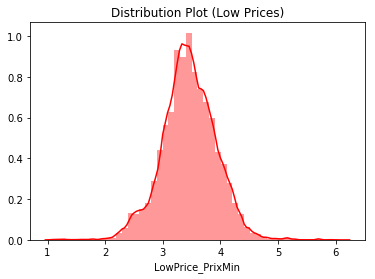

In [105]:
# Distribution Plots are a nice way to see if your data follows a "normal" distribution ! So far the maximum and minimum prices seem to be Normally distributed. 
plt.figure()
sns.distplot(log_min,color='red') 
plt.title('Distribution Plot (Low Prices)')

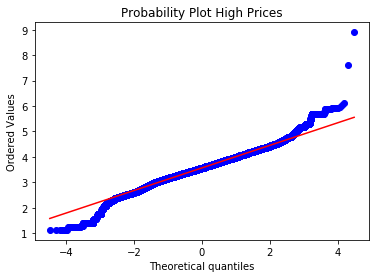

In [94]:
# A Good diagnostic for a normal distribution is a probability plot (if the data lines up on the trend line we can safely assume it is normally distributed)
plt.figure()
stats.probplot(log_max, dist="norm", plot = plt)
plt.title('Probability Plot High Prices');
plt.savefig("Probability Plots High.png")


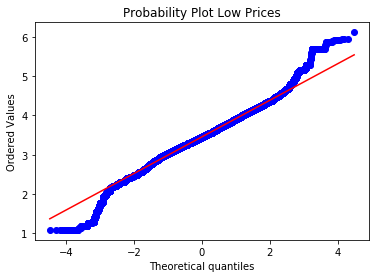

In [93]:
plt.figure()
stats.probplot(log_min, dist="norm", plot = plt);
plt.title('Probability Plot Low Prices')
plt.savefig("Probability Plots Low.png")